In [1]:
import pandas as pd
from datetime import datetime
import pickle
import matplotlib.pyplot as plt
import math

- filter by a certain number of trades in the hour (to make sure interest/movement)
- filter by a percent change (to get surprise/shock)

# Announcement EDA

In [12]:
### load the market_anns_map from using pickle
def load_market_anns_map():
  with open("./market_anns_storage/market_anns_map.pkl", "rb") as file:
    wrds_market_anns_map = pickle.load(file)
  
  for year, dict1 in wrds_market_anns_map.items():
    for ticker, dict2 in dict1.items():
      for date, time in dict2.items():
        dict2[date] = datetime.strptime(time, "%H:%M:%S")

  return wrds_market_anns_map

def get_market_anns_list(market_anns_map):
  market_anns_list = []

  for year, dict1 in market_anns_map.items():
    for ticker, dict2 in dict1.items():
      for date, time in dict2.items():
        market_anns_list.append([year, ticker, date, time])

  return market_anns_list

def get_market_anns_year_list(market_anns_map, selected_year):
  market_anns_year_list = []

  for year, dict1 in market_anns_map.items():
    if year == selected_year:
      for ticker, dict2 in dict1.items():
        for date, time in dict2.items():
          market_anns_year_list.append([year, ticker, date, time])

  return market_anns_year_list

market_anns_map = load_market_anns_map()
market_anns_list = get_market_anns_list(market_anns_map)
market_anns_list_2023 = get_market_anns_year_list(market_anns_map, 2023)
print(f"number of annoucements in 2023: {len(market_anns_list_2023)}")

number of annoucements in 2023: 406


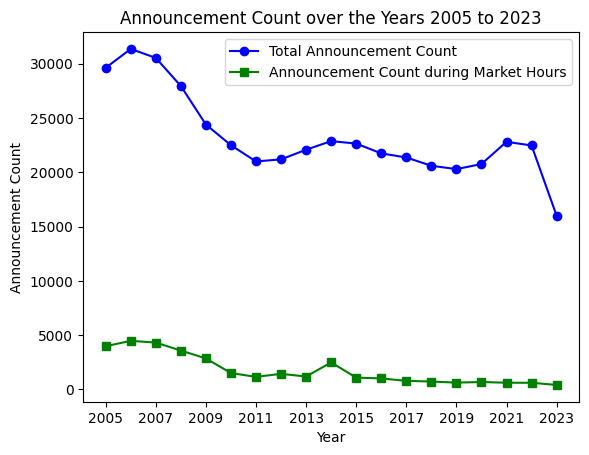

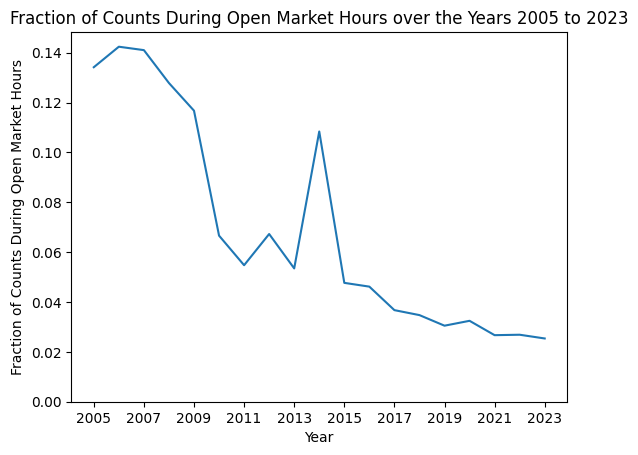

In [25]:
import csv

### plot years vs announcement count (and announcement count during market hours)

years = list(range(2005, 2024))
ann_count = [0 for _ in range(2023-2005+1)]
market_ann_count = [0 for _ in range(2023-2005+1)]

# get total announcement counts per year
with open("./raw_data/all_announcements.csv") as file:
  # TICKER,OFTIC,MEASURE,PDICITY,ANNDATS,ANNTIMS
  csv_reader = csv.reader(file)
  
  for i,row in enumerate(csv_reader):
    if i == 0:
      continue

    _, _, _, _, anndat, _ = row
    year_i = int(anndat[:4]) - 2005
    ann_count[year_i] += 1

# get total market announcement counts per year
for year in range(2005, 2024):
  market_ann_count[year-2005] += len(get_market_anns_year_list(market_anns_map, year))

# plot announcement counts
plt.plot(years, ann_count, label='Total Announcement Count', color='blue', marker='o')
plt.plot(years, market_ann_count, label='Announcement Count during Market Hours', color='green', marker='s')
plt.xticks(years[::2], [int(year) for year in years[::2]])
plt.xlabel('Year')
plt.ylabel('Announcement Count')
plt.title('Announcement Count over the Years 2005 to 2023')
plt.legend()
plt.show()

# plot announcement counts fraction during market hours
market_fractions = [market_ann_count[i]/ann_count[i] for i in range(len(ann_count))]
plt.plot(years, market_fractions)
plt.xticks(years[::2], [int(year) for year in years[::2]])
plt.xlabel('Year')
plt.ylabel('Fraction of Counts During Open Market Hours')
plt.ylim(0)
plt.title('Fraction of Counts During Open Market Hours over the Years 2005 to 2023')
plt.show()



# Initial Trade EDA

In [3]:
def get_df_year(year):
  df = pd.read_csv(f"./announcement_trades_csv/trades_{2023}.csv")
  df['TIME_M'] = pd.to_datetime(df['TIME_M'], format='%H:%M:%S.%f')
  df = df[['DATE', 'TIME_M', 'SYM_ROOT', 'SIZE', 'PRICE']]
  df.dropna(inplace=True)
  return df

df = get_df_year(2023)


print(df['SYM_ROOT'].unique())
print(df.head())
print(df.dtypes)

/var/folders/yc/n6lh7krx6p3b0zmdngvdb48c0000gn/T/ipykernel_72260/1419737818.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"./announcement_trades_csv/trades_{2023}.csv")


['ABEV' 'ACEL' 'ACON' 'ACST' 'ADP' 'AGFS' 'AIRT' 'AIU' 'ALGT' 'ALLR'
 'AMPG' 'ARTW' 'ASML' 'ATVI' 'AZUL' 'BATL' 'BB' 'BBLG' 'BCH' 'BEKE' 'BFIN'
 'BGCP' 'BLRX' 'BRY' 'BSAC' 'BTI' 'BTTR' 'BUD' 'CAAP' 'CARM' 'CBIO' 'CBL'
 'CFR' 'CISO' 'CNHI' 'CRBG' 'CRDL' 'CSPI' 'CUK' 'CX' 'CYBN' 'CYD' 'DCI'
 'DELL' 'DTSS' 'E' 'EBMT' 'ECC' 'ERJ' 'EVAX' 'EVO' 'FERG' 'FFNW' 'FKWL'
 'FMS' 'FMX' 'FNWB' 'FORD' 'FSI' 'FURY' 'FUV' 'GABC' 'GCBC' 'GEOS' 'GMAB'
 'GMBL' 'GNPX' 'GREE' 'GRRR' 'HOV' 'HTLD' 'HTOO' 'IGMS' 'III' 'INM' 'IPWR'
 'IRS' 'ISPO' 'KFFB' 'KYN' 'L' 'LASE' 'LEGH' 'LEV' 'LEXX' 'LIFW' 'LKFN'
 'LOMA' 'LSPD' 'MARA' 'MCBS' 'MDU' 'MDXH' 'MESA' 'MGEE' 'MLNK' 'MPB'
 'MRBK' 'MYNA' 'MYSZ' 'NECB' 'NICK' 'NMRK' 'NRP' 'NTCO' 'NTRB' 'NTWK'
 'NUTX' 'NXU' 'OBE' 'OCC' 'OMAB' 'ONB' 'PAC' 'PATI' 'PCSA' 'PCYO' 'PEAK'
 'POET' 'PPIH' 'PRT' 'PTIX' 'PULM' 'QIPT' 'RADI' 'RDW' 'RMCF' 'RNXT'
 'RVYL' 'SAL' 'SAP' 'SBFM' 'SGFY' 'SGMA' 'SGTX' 'SINT' 'SMBC' 'SONY' 'SPI'
 'SUNW' 'SUPV' 'TAK' 'TALO' 'TCN' 'THFF' 'THM' 'TK' 'TKC' 'TL

In [4]:
def plot(ticker, date):
  df1 = df[(df['SYM_ROOT'] == ticker)]
  df2 = df1[(df1['DATE'] == date)]
  plt.plot(df2['TIME_M'], df2['PRICE'])

  announcement_time = market_anns_map[2023][ticker][date]
  plt.xlabel('Time')
  plt.ylabel('Price')
  plt.axvline(x=announcement_time, color='r', linestyle='--', label='Announcement Time')
  plt.title(f'Price vs Time for {ticker} on {date}')
  plt.legend()
  plt.show()

In [5]:
def get_avg_price_before_ann(year, ticker, date):
  annoucement_time = market_anns_map[year][ticker][date]
  return float(df[(df['SYM_ROOT'] == ticker) & (df['TIME_M'] < annoucement_time)]['PRICE'].mean())
  

def get_avg_price_after_ann(year, ticker, date):
  annoucement_time = market_anns_map[year][ticker][date]
  return float(df[(df['SYM_ROOT'] == ticker) & (df['TIME_M'] > annoucement_time)]['PRICE'].mean())

def get_avg_price_change(year, ticker, date):
  p2 = get_avg_price_after_ann(year, ticker, date)
  p1 = get_avg_price_before_ann(year, ticker, date)
  return abs((p2-p1)/p1)

def get_count_trades(year, ticker, date):
  return float((df[(df['SYM_ROOT'] == ticker) & (df['DATE'] == date)]['PRICE']).sum())

In [6]:
market_anns_list_stats = []
for year, ticker, date, anntim in market_anns_list_2023:
  percent_change = get_avg_price_change(year, ticker, date)
  trade_count = get_count_trades(year, ticker, date)
  if not math.isnan(trade_count) and not math.isnan(percent_change):
    market_anns_list_stats.append([year, ticker, date, anntim, trade_count, percent_change])

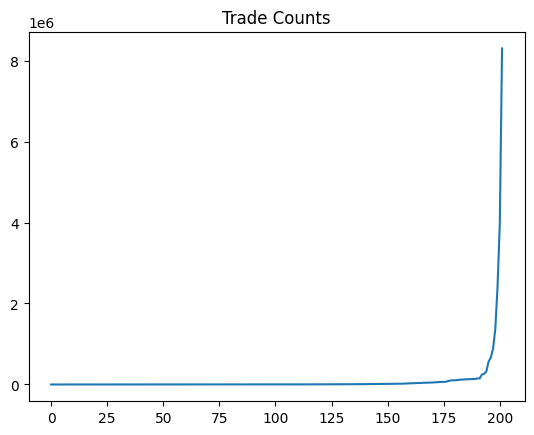

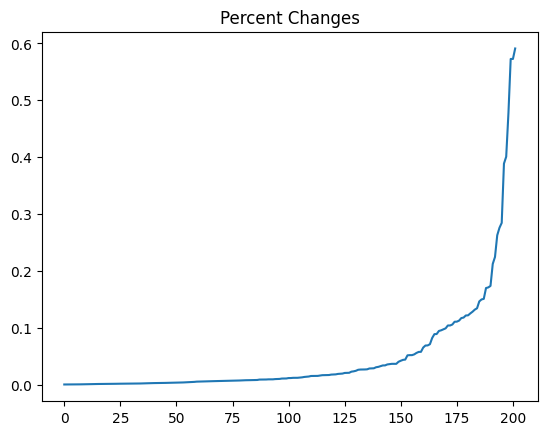

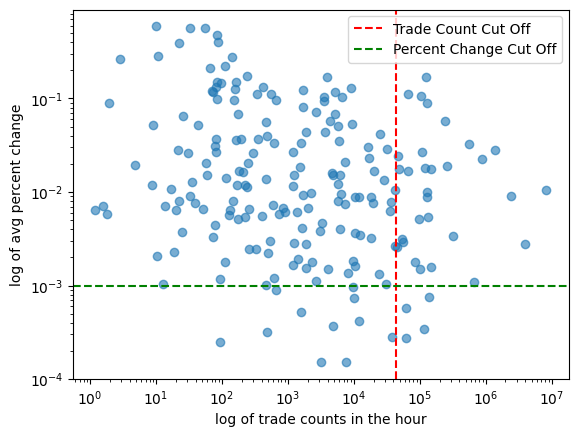

In [7]:
unsorted_trade_counts = [trade_count for year, ticker, date, anntim, trade_count, percent_change in market_anns_list_stats]
unsorted_percent_changes = [percent_change for year, ticker, date, anntim, trade_count, percent_change in market_anns_list_stats]

trade_counts = sorted(unsorted_trade_counts)
plt.plot(list(range(len(trade_counts))), trade_counts)
plt.title("Trade Counts")
plt.show()

percent_changes = sorted(unsorted_percent_changes)
plt.plot(list(range(len(trade_counts))), percent_changes)
plt.title("Percent Changes")
plt.show()

trade_count_cutoff = 60*60*12 # 12 trade every second
percent_change_cutoff = 0.001 # 0.1% change in stock price

plt.scatter(unsorted_trade_counts, unsorted_percent_changes, alpha=0.6)
plt.axvline(x=trade_count_cutoff, color='r', linestyle='--', label='Trade Count Cut Off')
plt.axhline(y=percent_change_cutoff, color='g', linestyle='--', label='Percent Change Cut Off')
plt.xlabel("log of trade counts in the hour")
plt.ylabel("log of avg percent change")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [8]:
main_market_anns_list_2023 = []
for year, ticker, date, anntim, trade_count, percent_change in market_anns_list_stats:
  if trade_count > trade_count_cutoff and percent_change > percent_change_cutoff:
    main_market_anns_list_2023.append([year, ticker, date, anntim, trade_count, percent_change])
print(len(main_market_anns_list_2023))


30


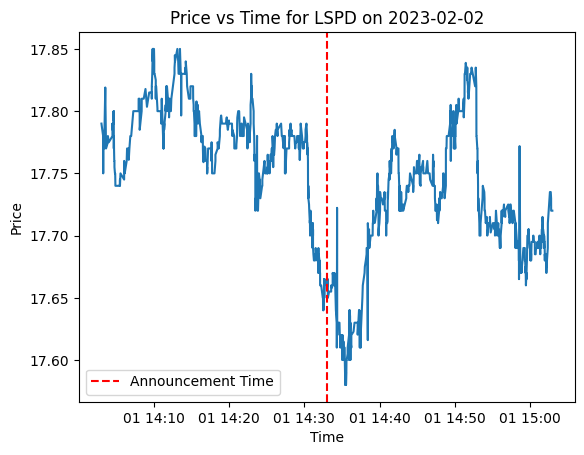

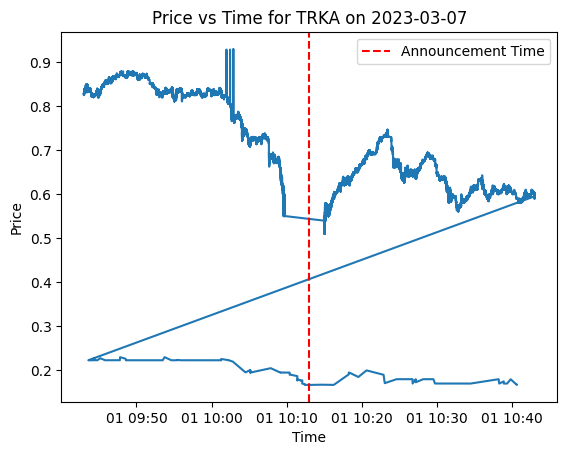

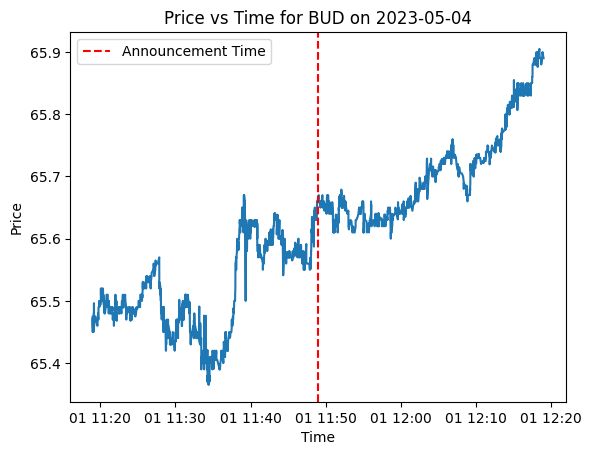

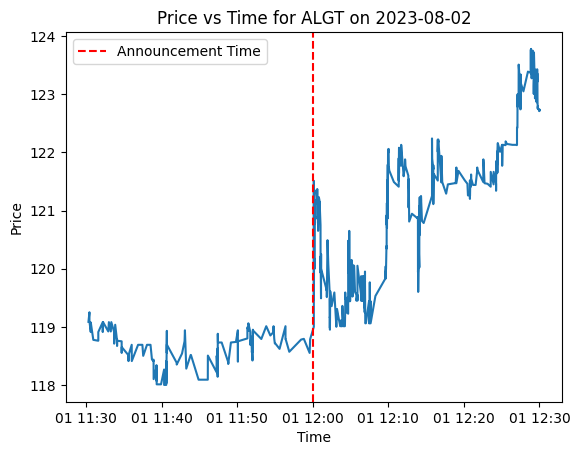

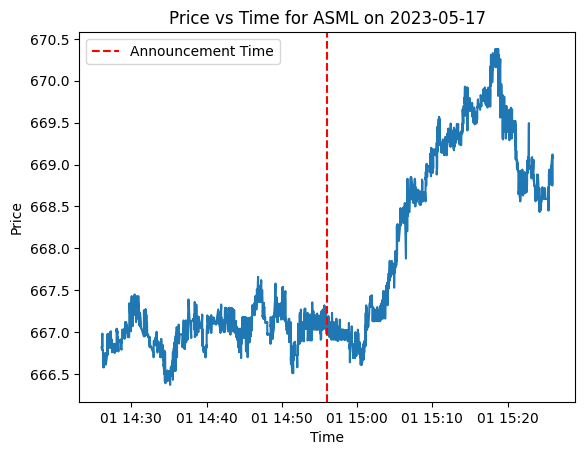

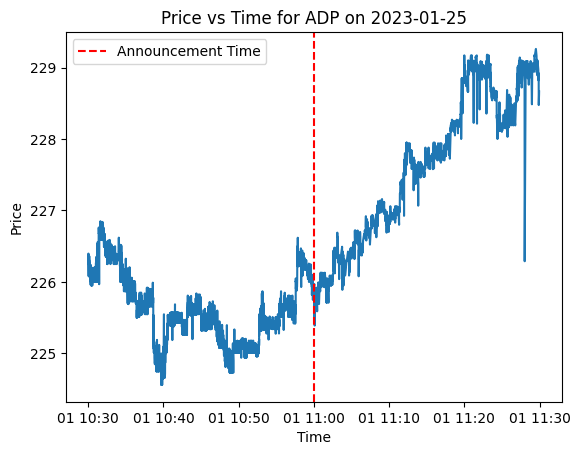

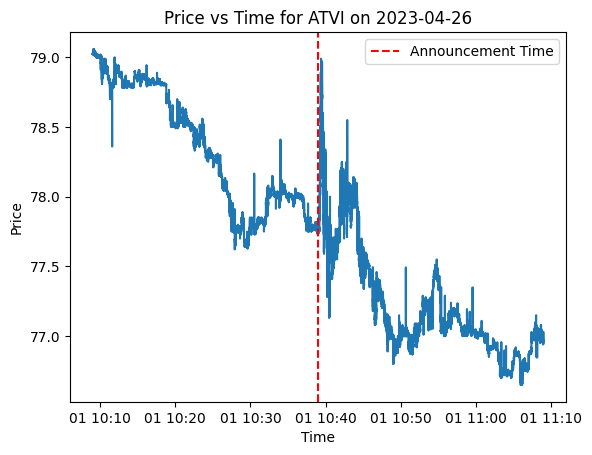

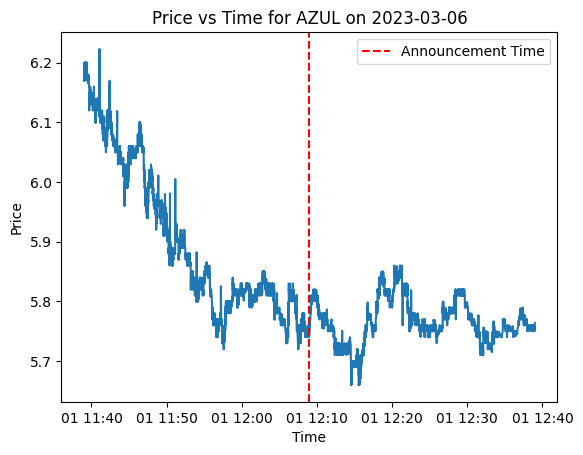

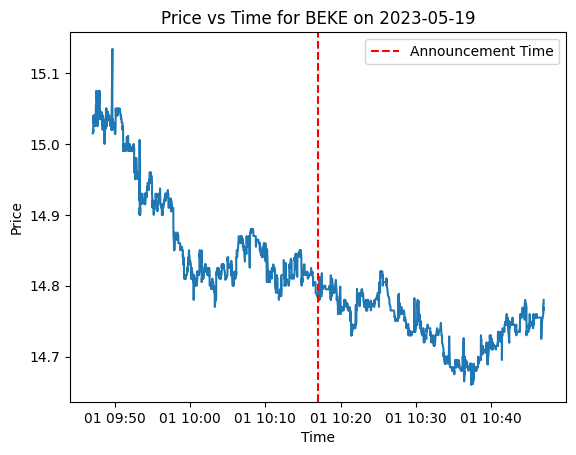

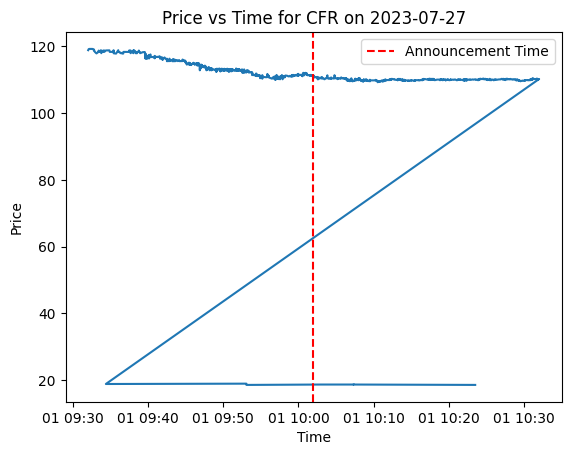

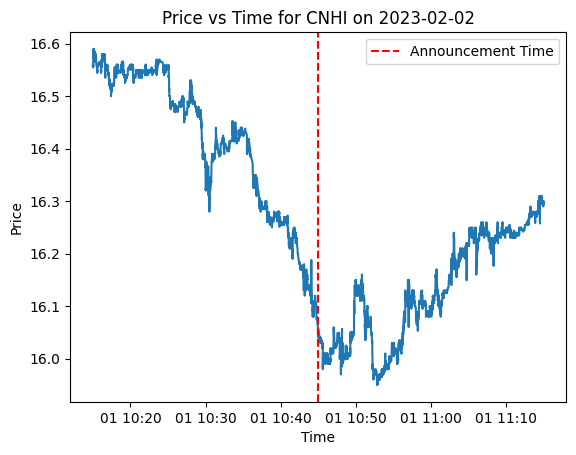

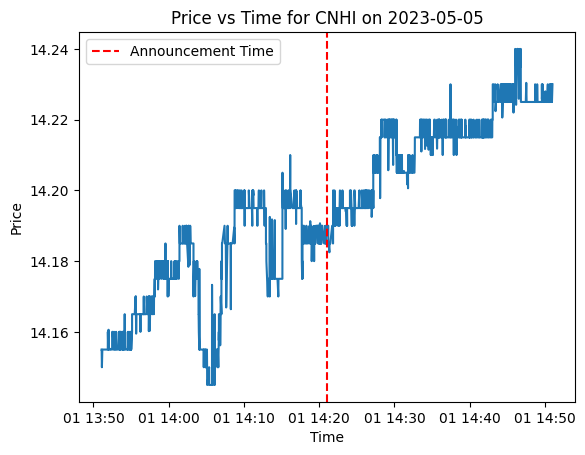

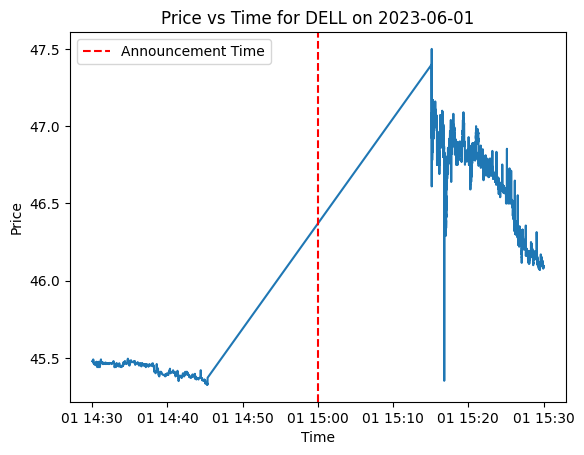

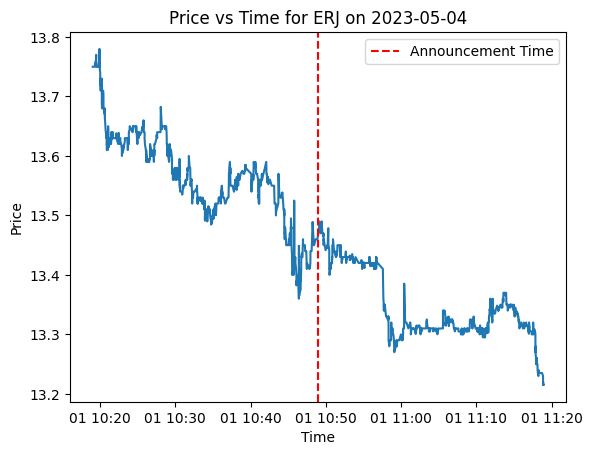

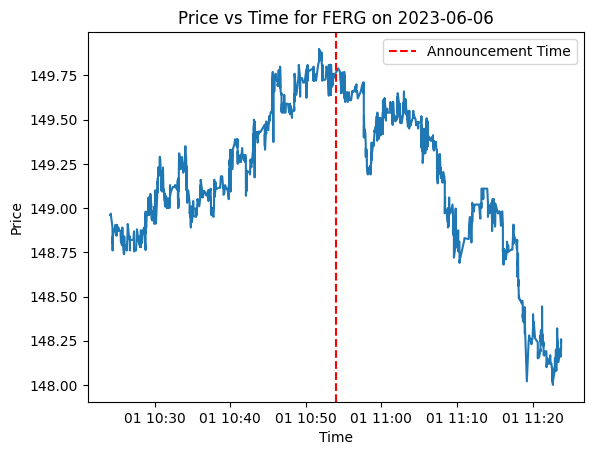

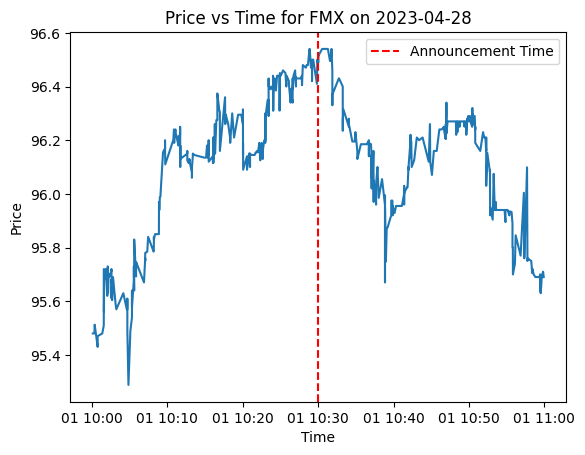

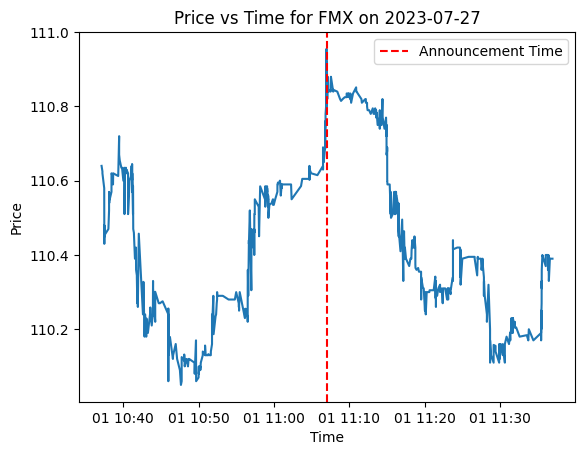

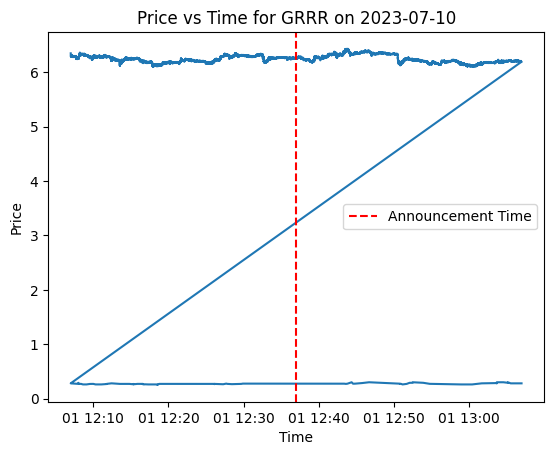

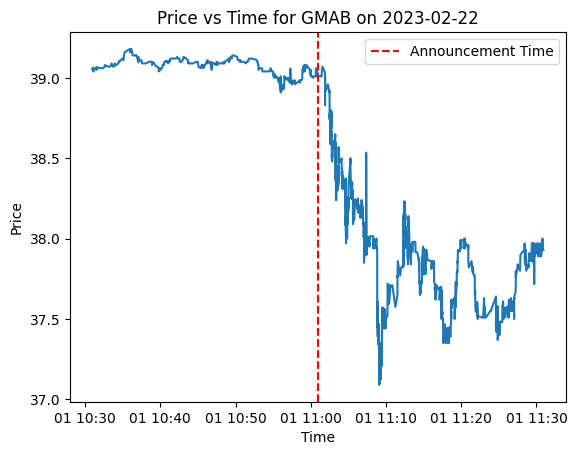

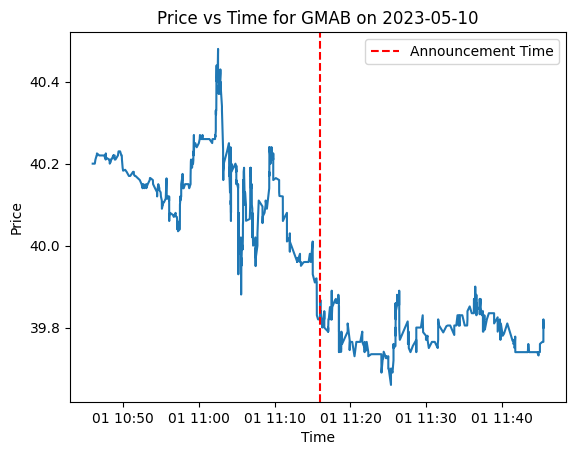

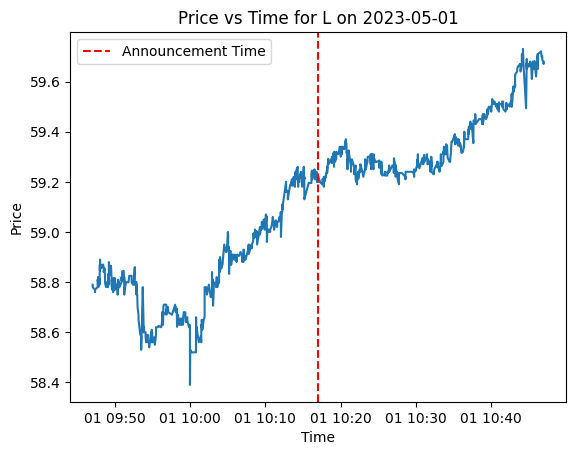

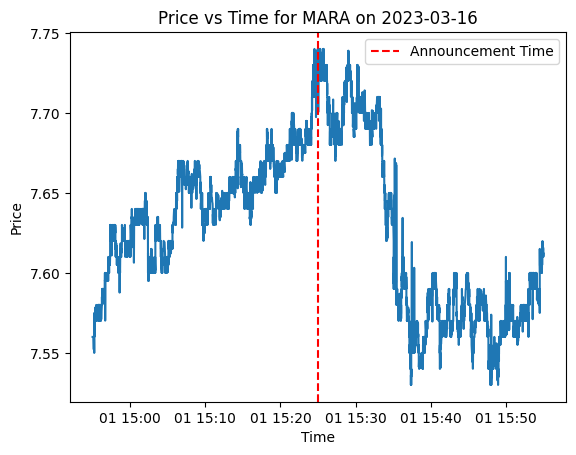

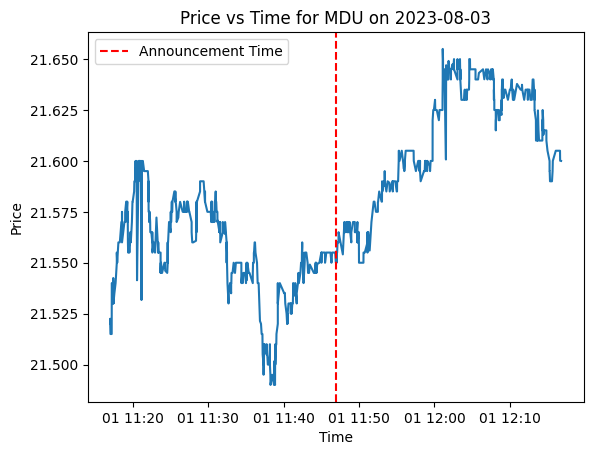

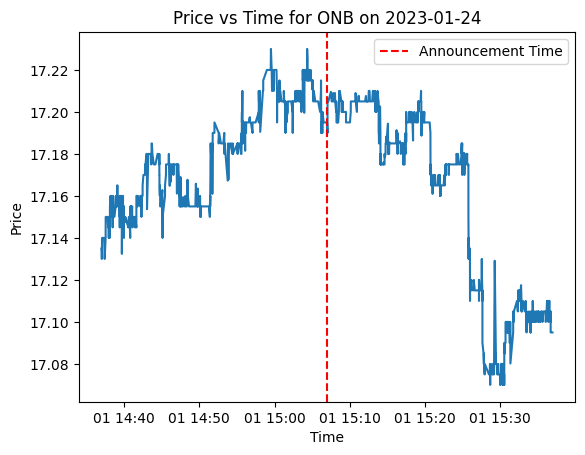

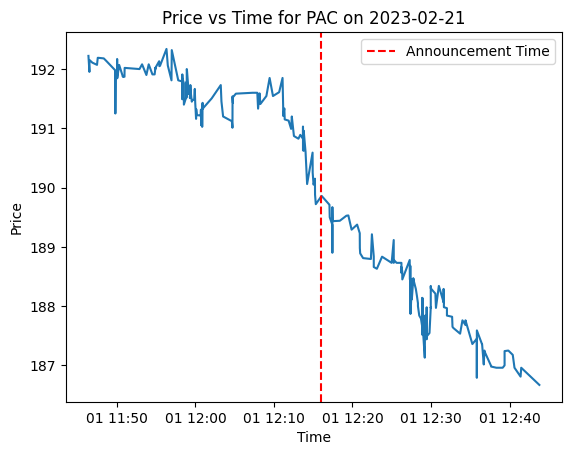

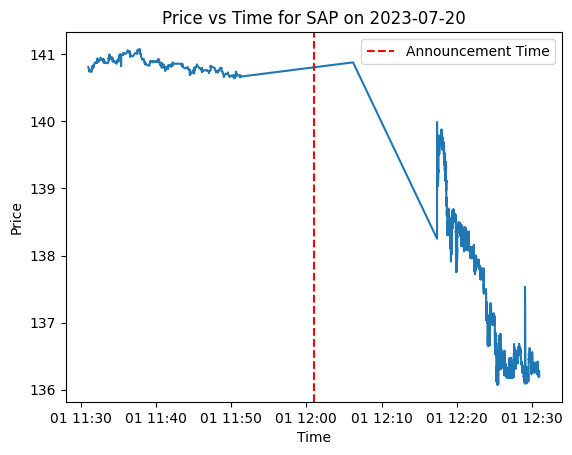

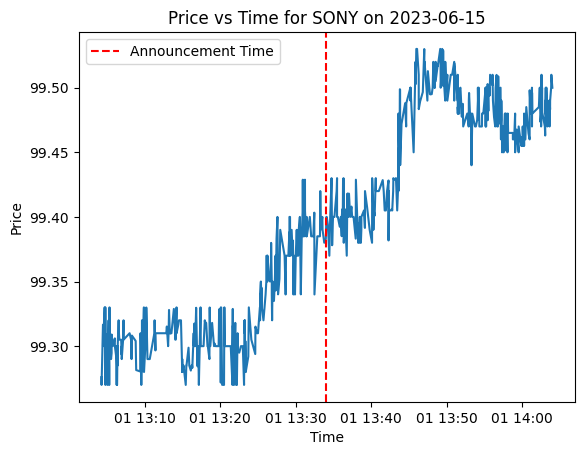

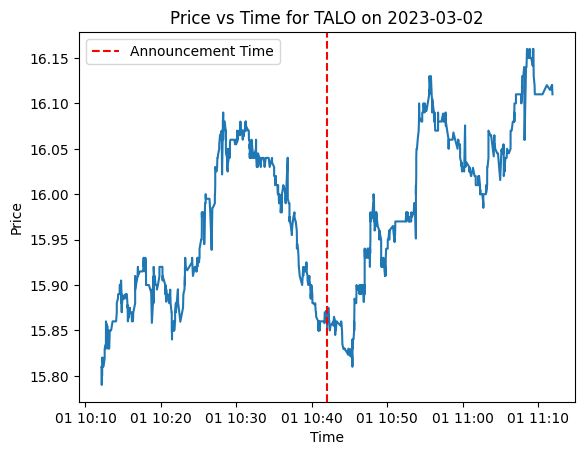

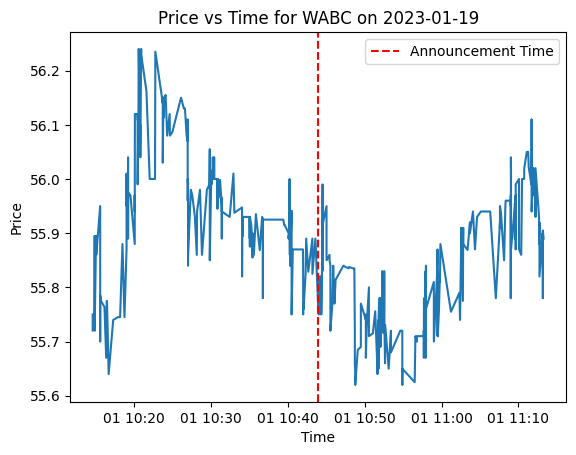

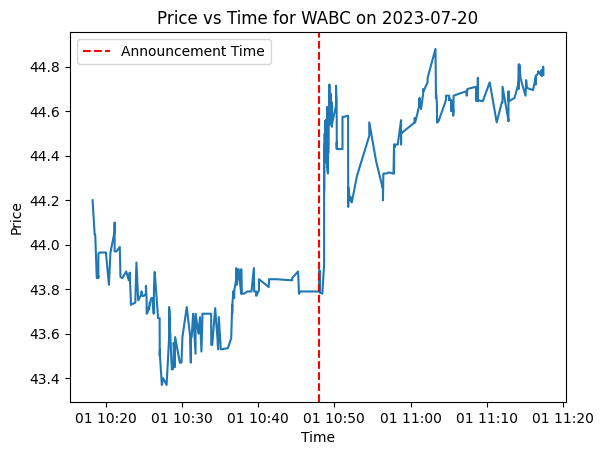

In [11]:
for year, ticker, date, anntim, trade_count, percent_change in main_market_anns_list_2023:
  plot(ticker, date)